In [9]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotnine as gg
from plotnine import *
from sklearn import preprocessing
%matplotlib inline

In [10]:
data = pd.read_csv("/Users/habbasi/Desktop/aggregated_perdose_drug_target.csv", encoding= "Latin-1")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1069) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Defining new column based on samples are either Drug and Target Controls, treatments

In [11]:
# data['Metadata_datatype'] = None 

# data.loc[(data.Metadata_Plate_Map_Name!="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample =="DMSO"), 'Metadata_datatype'] = 'Drug_DMSO'
# data.loc[(data.Metadata_Plate_Map_Name!="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample !="DMSO"), 'Metadata_datatype'] = 'Drug_treatments'
# data.loc[(data.Metadata_Plate_Map_Name=="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample =="DMSO"), 'Metadata_datatype'] = 'Target_DMSO'
# data.loc[(data.Metadata_Plate_Map_Name=="C-7217-01-B80-003-A549") & (data.Metadata_broad_sample !="DMSO"), 'Metadata_datatype'] = 'Target_treatments'


In [12]:
#data['Metadata_platemap'] = np.where((data['Metadata_Plate_Map_Name'] != "C-7217-01-B80-003-A549") & (data['Metadata_broad_sample'] == "DMSO") , "drug_treatments", "drug_DMSO")
#data.to_csv("/Users/habbasi/Desktop/test.csv")

In [1]:
Metadata = [col for col in data.columns if "Meta" in col]
Variables = [col for col in data.columns if not "Meta" in col]


NameError: name 'data' is not defined

In [14]:
# control_t = data[(data.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549") & (data.Metadata_broad_sample == "DMSO")]
# control_d = data[(data.Metadata_Plate_Map_Name != "C-7217-01-B80-003-A549") & (data.Metadata_broad_sample == "DMSO")]

# target = data[data.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549"]
# drug = data[data.Metadata_Plate_Map_Name = "C-7217-01-B80-003-A549"]

In [15]:
# plates = data.Metadata_Plate.unique()
# p = [pl for pl in plates]
# p

# def normalize(data, groupby, sample)

In [16]:
import umap.umap_ as umap
reducer=umap.UMAP()

In [17]:
embedding = reducer.fit_transform(data.loc[:, Variables])
embedding.shape


/usr/local/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../../usr/local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


(9718, 2)

In [18]:
test = pd.DataFrame(embedding, columns= ['UMAP-1', 'UMAP-2'])
combined = test.merge(data.loc[:, Metadata], left_index=True, right_index=True)
#combined.to_csv("/Users/habbasi/Desktop/2016_03_14_TargetID_Wagner_Schenone_BWH/Github_repo/2016_03_14_TargetID_Wagner_Schenone_new/Scripts/final/UMAP_shiny/data/UMAP_embeddings.csv")

In [10]:
# combined['Metadata_compounds'] = combined['Metadata_broad_sample'] + "_" + combined['Metadata_platemap']
# combined['Metadata_compounds'] = combined['Metadata_compounds'].str.replace('BRD-', '')
# [combined.Metadata_compounds.str.contains('_t') for x in combined.Metadata_compounds]
# combined

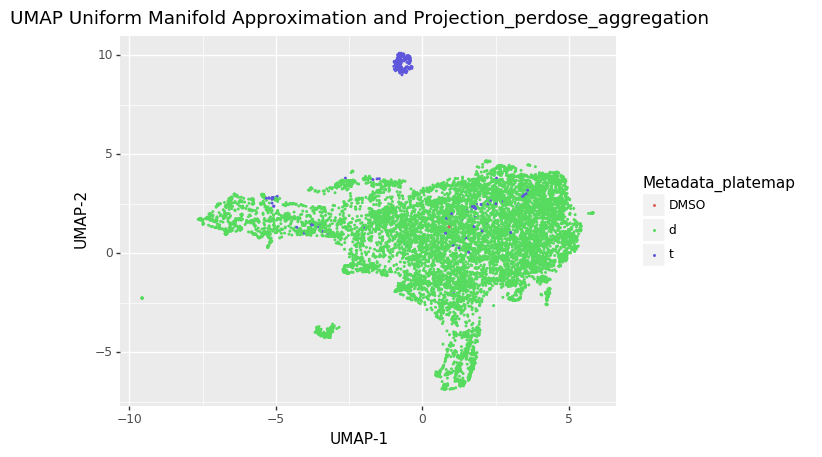

<ggplot: (-9223372036525632319)>

In [19]:
p = gg.ggplot(combined, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_platemap')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection_perdose_aggregation") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

#ggsave(filename='Drug_target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [12]:
target = data[data.Metadata_Plate_Map_Name == "C-7217-01-B80-003-A549"]
target.head()

,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_Contrast_Mito_20_0,Nuclei_Texture_SumAverage_DNA_10_0,Nuclei_Texture_SumAverage_Mito_20_0,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_ER_20_0,Metadata_platemap
52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,NaN,NaN,A01,...,-0.159840,-0.140781,0.315618,-0.228688,1.962688,0.564242,1.220693,0.664363,1.436611,Target_DMSO
52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,NaN,NaN,A02,...,0.178066,-0.261277,0.723372,-1.554559,-0.266257,-0.487684,0.238012,0.375236,1.345596,Target_DMSO
52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.000000,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A03,...,0.684262,-0.736992,0.998241,-0.482684,-1.162348,-0.723071,-0.173534,0.042539,1.350699,Target_treatments
52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.333333,DMSO,BRD-K15318909,BRD-K15318909-001-02-2,A04,...,1.010251,-0.261620,0.268822,2.277766,-4.777382,-0.628413,-4.828345,-5.311893,2.025663,Target_treatments
52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.500000,DMSO,BRD-K78599730,BRD-K78599730-001-02-6,A05,...,0.543188,-0.727812,0.475280,-0.350170,-1.289033,-1.008223,-1.390675,-1.388470,-0.127653,Target_treatments


In [13]:
Metadata = [col for col in target.columns if "Meta" in col]
Variables = [col for col in target.columns if not "Meta" in col]

In [14]:
data['Metadata_broad_sample'].unique()

array(['DMSO', 'BRD-A61676498-001-06-6', 'BRD-K55966568-001-05-4', ...,
       'BRD-K82846253-001-13-9', 'BRD-K51318897-001-13-8',
       'BRD-K36055864-001-07-7'], dtype=object)

In [15]:
import umap.umap_ as umap
reducer=umap.UMAP()

In [16]:
embedding_target = reducer.fit_transform(target.loc[:, Variables])


In [17]:
target_embedding = pd.DataFrame(embedding_target, columns= ['UMAP-1', 'UMAP-2'])
target_embedding

,UMAP-1,UMAP-2
0,0.834321,-2.773759
1,1.071736,-1.883216
2,0.839114,-1.677864
3,1.990469,6.130849
4,-2.764635,2.303042
...,...,...
1915,-1.920345,-5.443887
1916,-1.863114,-5.853066
1917,-1.892198,-5.155860
1918,-1.862651,-5.839143


In [18]:
pmeta = target.loc[:, Metadata].reset_index()
pmeta
target_merged = target_embedding.merge(pmeta,left_index=True, right_index=True)
# target_merged = pd.concat([pmeta, target_embedding], axis=1, join='inner')
target_merged.head()

,UMAP-1,UMAP-2,index,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Metadata_pert_mfc_id,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap
0,0.834321,-2.773759,52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,...,NaN,A01,NaN,NaN,control,NaN,control,NaN,NaN,Target_DMSO
1,1.071736,-1.883216,52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,...,NaN,A02,NaN,A549,control,DMSO,control,NaN,NaN,Target_DMSO
2,0.839114,-1.677864,52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.000000,DMSO,...,BRD-K15318909-001-02-2,A03,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments
3,1.990469,6.130849,52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.333333,DMSO,...,BRD-K15318909-001-02-2,A04,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments
4,-2.764635,2.303042,52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.500000,DMSO,...,BRD-K78599730-001-02-6,A05,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/target_UMAP.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


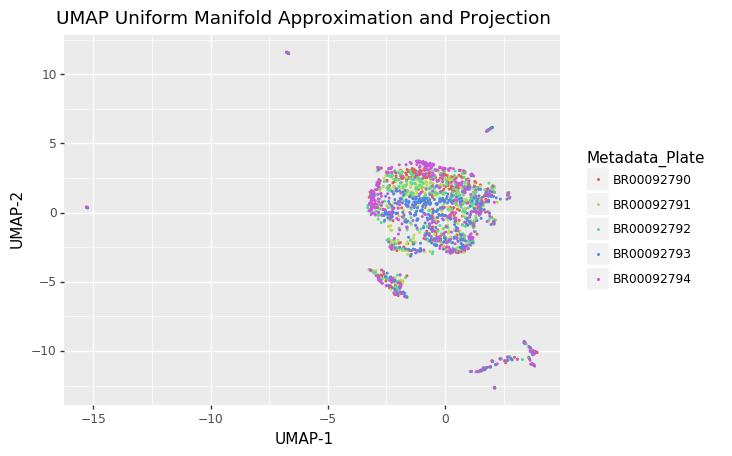

<ggplot: (-9223372036537061225)>

In [19]:
p = gg.ggplot(target_merged, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_broad_sample')) + \
    gg.geom_point(size = 0.2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection") #+ \
    #gg.scale_colour_manual(name= "Platemap", labels=['Drug_Controls', 'Drug_Treatments', 'Target_Controls', 'Target_Treatments'], values = ["#d95f0e", "#fec44f", "#2c7fb8", "#7fcdbb"])
   


    

ggsave(filename='target_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [20]:
target['Metadata_control_treatments'] = None 

target.loc[target.Metadata_broad_sample == "BRD-K02407574-001-04-8", 'Metadata_control_treatments'] = 'K02407574'
target.loc[target.Metadata_broad_sample == "BRD-K60907894-003-14-4", 'Metadata_control_treatments'] = 'K60907894'
target.loc[target.Metadata_broad_sample == "BRD-K82846253-001-13-9", 'Metadata_control_treatments'] = 'K82846253'
target.loc[target.Metadata_broad_sample == "BRD-K51318897-001-13-8", 'Metadata_control_treatments'] = 'K51318897'
target.loc[target.Metadata_broad_sample == "BRD-K36055864-001-07-7", 'Metadata_control_treatments'] = 'K36055864'
target.loc[target.Metadata_broad_sample == "DMSO", 'Metadata_control_treatments'] = 'DMSO'
# target.loc[(target.Metadata_broad_sample != "DMSO") & (target.Metadata_moa != "Cell Painting control"), 'Metadata_control_treatments'] = 'Treatments'



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [138]:


target.to_csv("/Users/habbasi/Desktop/target.csv")

In [21]:
Metadata = [col for col in target.columns if "Meta" in col]
Variables = [col for col in target.columns if not "Meta" in col]

In [22]:
import umap.umap_ as umap
reducer=umap.UMAP()

In [23]:
embedding_target = reducer.fit_transform(target.loc[:, Variables])

In [24]:
pmeta = target.loc[:, Metadata].reset_index()
pmeta
target_merged = target_embedding.merge(pmeta,left_index=True, right_index=True)
# target_merged = pd.concat([pmeta, target_embedding], axis=1, join='inner')
target_merged.head()

,UMAP-1,UMAP-2,index,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,...,Metadata_pert_well,Metadata_pert_id_vendor,Metadata_cell_id,Metadata_broad_sample_type,Metadata_pert_vehicle,Metadata_pert_type,Metadata_moa,Metadata_pert_name,Metadata_platemap,Metadata_control_treatments
0,0.834321,-2.773759,52223,BR00092790,A01,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,NaN,...,A01,NaN,NaN,control,NaN,control,NaN,NaN,Target_DMSO,DMSO
1,1.071736,-1.883216,52224,BR00092790,A02,C-7217-01-B80-003-A549,DMSO,0.000000,0.000000,DMSO,...,A02,NaN,A549,control,DMSO,control,NaN,NaN,Target_DMSO,DMSO
2,0.839114,-1.677864,52225,BR00092790,A03,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,1.852203,10.000000,DMSO,...,A03,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments,None
3,1.990469,6.130849,52226,BR00092790,A04,C-7217-01-B80-003-A549,BRD-K15318909-001-02-2,0.617401,3.333333,DMSO,...,A04,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments,None
4,-2.764635,2.303042,52227,BR00092790,A05,C-7217-01-B80-003-A549,BRD-K78599730-001-02-6,1.376607,2.500000,DMSO,...,A05,NaN,A549,trt,DMSO,trt,NaN,NaN,Target_treatments,None


/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/usr/local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /Users/habbasi/Desktop/target_cellpaintingcontrols_DMSO_UMAP.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1520 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/site-packages/plotnine/guides/guides.py:261: PlotnineWarning: geom_point legend : Removed 1 rows containing missing values.
  gdef = gdef.create_geoms(plot)
/usr/local/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1520 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/usr/local/lib/python3.7/site-packages/plotnine/guides/guides.py:261: PlotnineWa

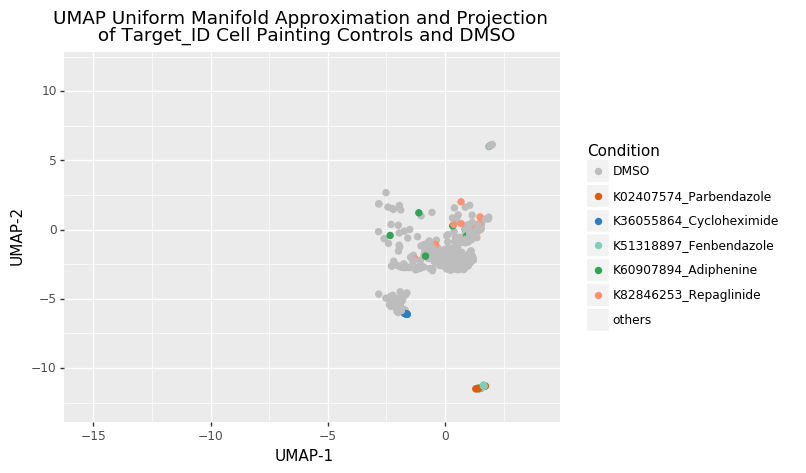

<ggplot: (315350648)>

In [25]:
p = gg.ggplot(target_merged, gg.aes(x='UMAP-1', y='UMAP-2', color= 'Metadata_control_treatments')) + \
    gg.geom_point(size = 2) + \
    gg.xlab("UMAP-1") + \
    gg.ylab("UMAP-2") + \
    gg.ggtitle("UMAP Uniform Manifold Approximation and Projection \n of Target_ID Cell Painting Controls and DMSO") + \
  gg.scale_colour_manual(name= "Condition", labels=['DMSO','K02407574_Parbendazole', 
                                                       'K36055864_Cycloheximide', 
                                                       'K51318897_Fenbendazole',
                                                         'K60907894_Adiphenine',
                                                          'K82846253_Repaglinide', 'others'], 
                           values = ["#bdbdbd","#d95f0e", "#2c7fb8", "#7fcdbb", "#31a354", "#fc9272", "#f0f0f0"])
   


    

ggsave(filename='target_cellpaintingcontrols_DMSO_UMAP.png', plot = p, path = '/Users/habbasi/Desktop/')

p 

In [127]:
target.loc[target.Metadata_broad_sample =="BRD-K36055864-001-07-7"]

,Metadata_Plate,Metadata_Well,Metadata_Plate_Map_Name,Metadata_broad_sample,Metadata_mg_per_ml,Metadata_mmoles_per_liter,Metadata_solvent,Metadata_pert_id,Metadata_pert_mfc_id,Metadata_pert_well,...,Nuclei_Texture_SumAverage_Mito_10_0,Nuclei_Texture_SumAverage_Mito_20_0,Nuclei_Texture_SumAverage_RNA_10_0,Nuclei_Texture_Entropy_DNA_20_0,Nuclei_RadialDistribution_MeanFrac_AGP_1of4,Nuclei_Texture_SumVariance_DNA_10_0,Nuclei_Texture_SumVariance_DNA_20_0,Nuclei_Texture_SumVariance_RNA_5_0,Metadata_platemap,Metadata_control_treatments
52597,BR00092790,P15,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P15,...,-0.721270,-1.032474,4.218344,-0.981459,3.360724,1.786575,2.852203,-0.569916,Target_treatments,K36055864
52598,BR00092790,P16,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P16,...,-1.856834,-1.770070,3.452297,0.562762,3.397421,1.378021,3.240843,0.271039,Target_treatments,K36055864
52981,BR00092791,P15,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P15,...,-1.505793,-1.436775,3.171073,-0.127995,3.953540,1.793086,2.907832,-0.711034,Target_treatments,K36055864
52982,BR00092791,P16,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P16,...,-1.884180,-1.664989,3.443057,-1.922966,0.967891,1.647638,1.888750,-0.138808,Target_treatments,K36055864
53365,BR00092792,P15,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P15,...,-2.047800,-2.006618,3.328529,-1.368545,1.329520,1.057013,3.138512,-0.272263,Target_treatments,K36055864
53366,BR00092792,P16,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P16,...,-2.572912,-2.672118,3.834819,0.359826,1.995393,1.169404,3.783563,0.668326,Target_treatments,K36055864
53749,BR00092793,P15,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P15,...,-1.555888,-1.543704,1.790961,0.747210,6.978810,2.400009,2.603092,-0.308010,Target_treatments,K36055864
53750,BR00092793,P16,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P16,...,-1.421768,-1.538465,4.792252,2.109228,3.023210,3.452091,3.119507,1.886125,Target_treatments,K36055864
54133,BR00092794,P15,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P15,...,-3.294452,-3.624904,4.134890,-1.514581,2.077526,1.302719,2.426714,1.848636,Target_treatments,K36055864
54134,BR00092794,P16,C-7217-01-B80-003-A549,BRD-K36055864-001-07-7,1.407,5.0,DMSO,BRD-K36055864,BRD-K36055864-001-07-7,P16,...,-1.893597,-2.074107,4.648552,0.668166,2.256563,3.089729,3.378261,0.618820,Target_treatments,K36055864
